In [31]:
! npm install random-forest-classifier



up to date in 1m


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns


In [2]:
df = pd.read_csv("Titanic.csv.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.shape

(891, 12)

In [7]:
df.size

10692

In [8]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [9]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [10]:
df['Age'].fillna(df['Age'].median(),inplace = True)

In [11]:
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

In [12]:
x = df.drop('Survived',axis=1)
y = df['Survived']

In [13]:
print(x)

     Pclass  Sex   Age  SibSp  Parch     Fare
0         3    0  22.0      1      0   7.2500
1         1    1  38.0      1      0  71.2833
2         3    1  26.0      0      0   7.9250
3         1    1  35.0      1      0  53.1000
4         3    0  35.0      0      0   8.0500
..      ...  ...   ...    ...    ...      ...
886       2    0  27.0      0      0  13.0000
887       1    1  19.0      0      0  30.0000
888       3    1  28.0      1      2  23.4500
889       1    0  26.0      0      0  30.0000
890       3    0  32.0      0      0   7.7500

[891 rows x 6 columns]


In [14]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
model = RandomForestClassifier(n_estimators=100,random_state=0)

In [17]:
model.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [18]:
y_pred = model.predict(x_test)

In [19]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.8324022346368715


In [20]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000
887,1,1,1,19.0,0,0,30.0000
888,0,3,1,28.0,1,2,23.4500
889,1,1,0,26.0,0,0,30.0000


C:\Users\Nikhil\AppData\Local\Temp\ipykernel_17064\3089530644.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"])


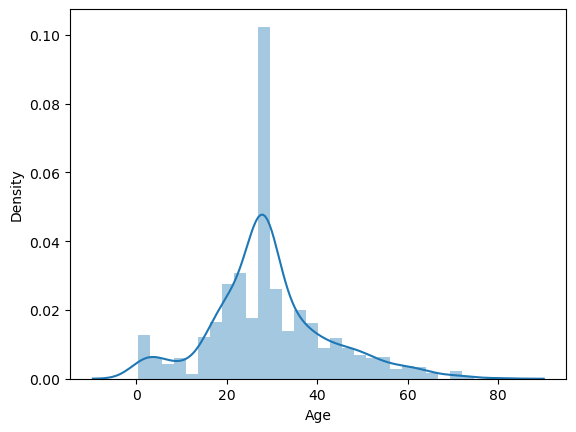

In [21]:
sns.distplot(df["Age"])
plt.show()

C:\Users\Nikhil\AppData\Local\Temp\ipykernel_17064\448330821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"],kde=False,bins=10)


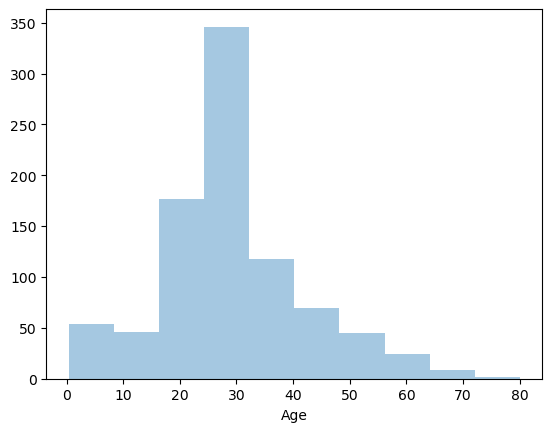

In [22]:
sns.distplot(df["Age"],kde=False,bins=10)
plt.show()

C:\Users\Nikhil\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


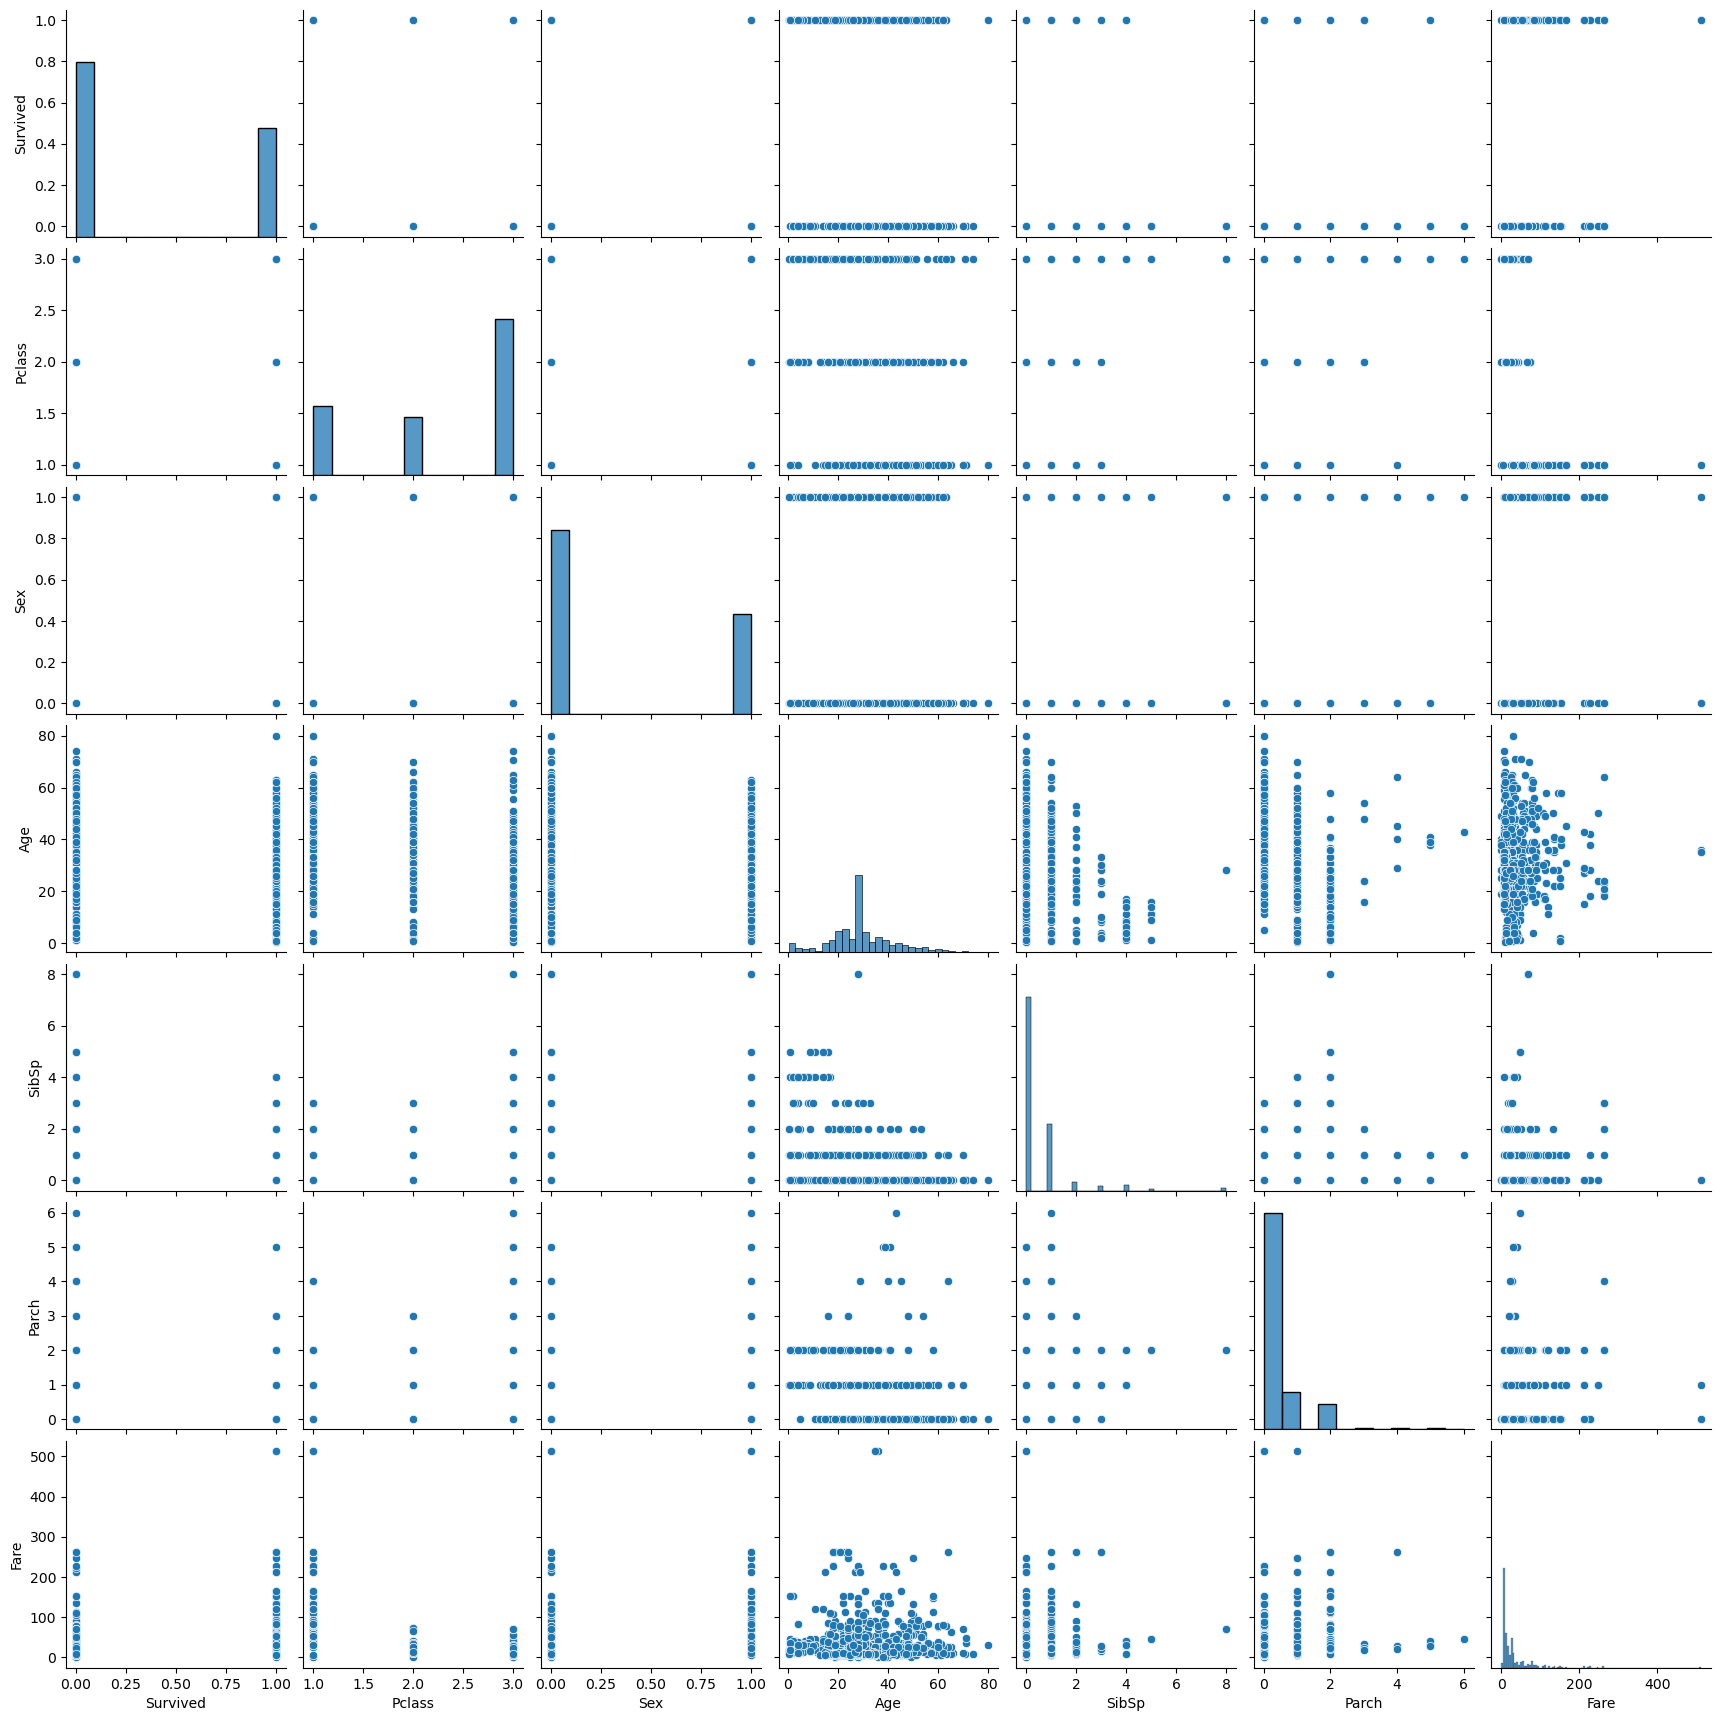

In [23]:
sns.pairplot(df)

C:\Users\Nikhil\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


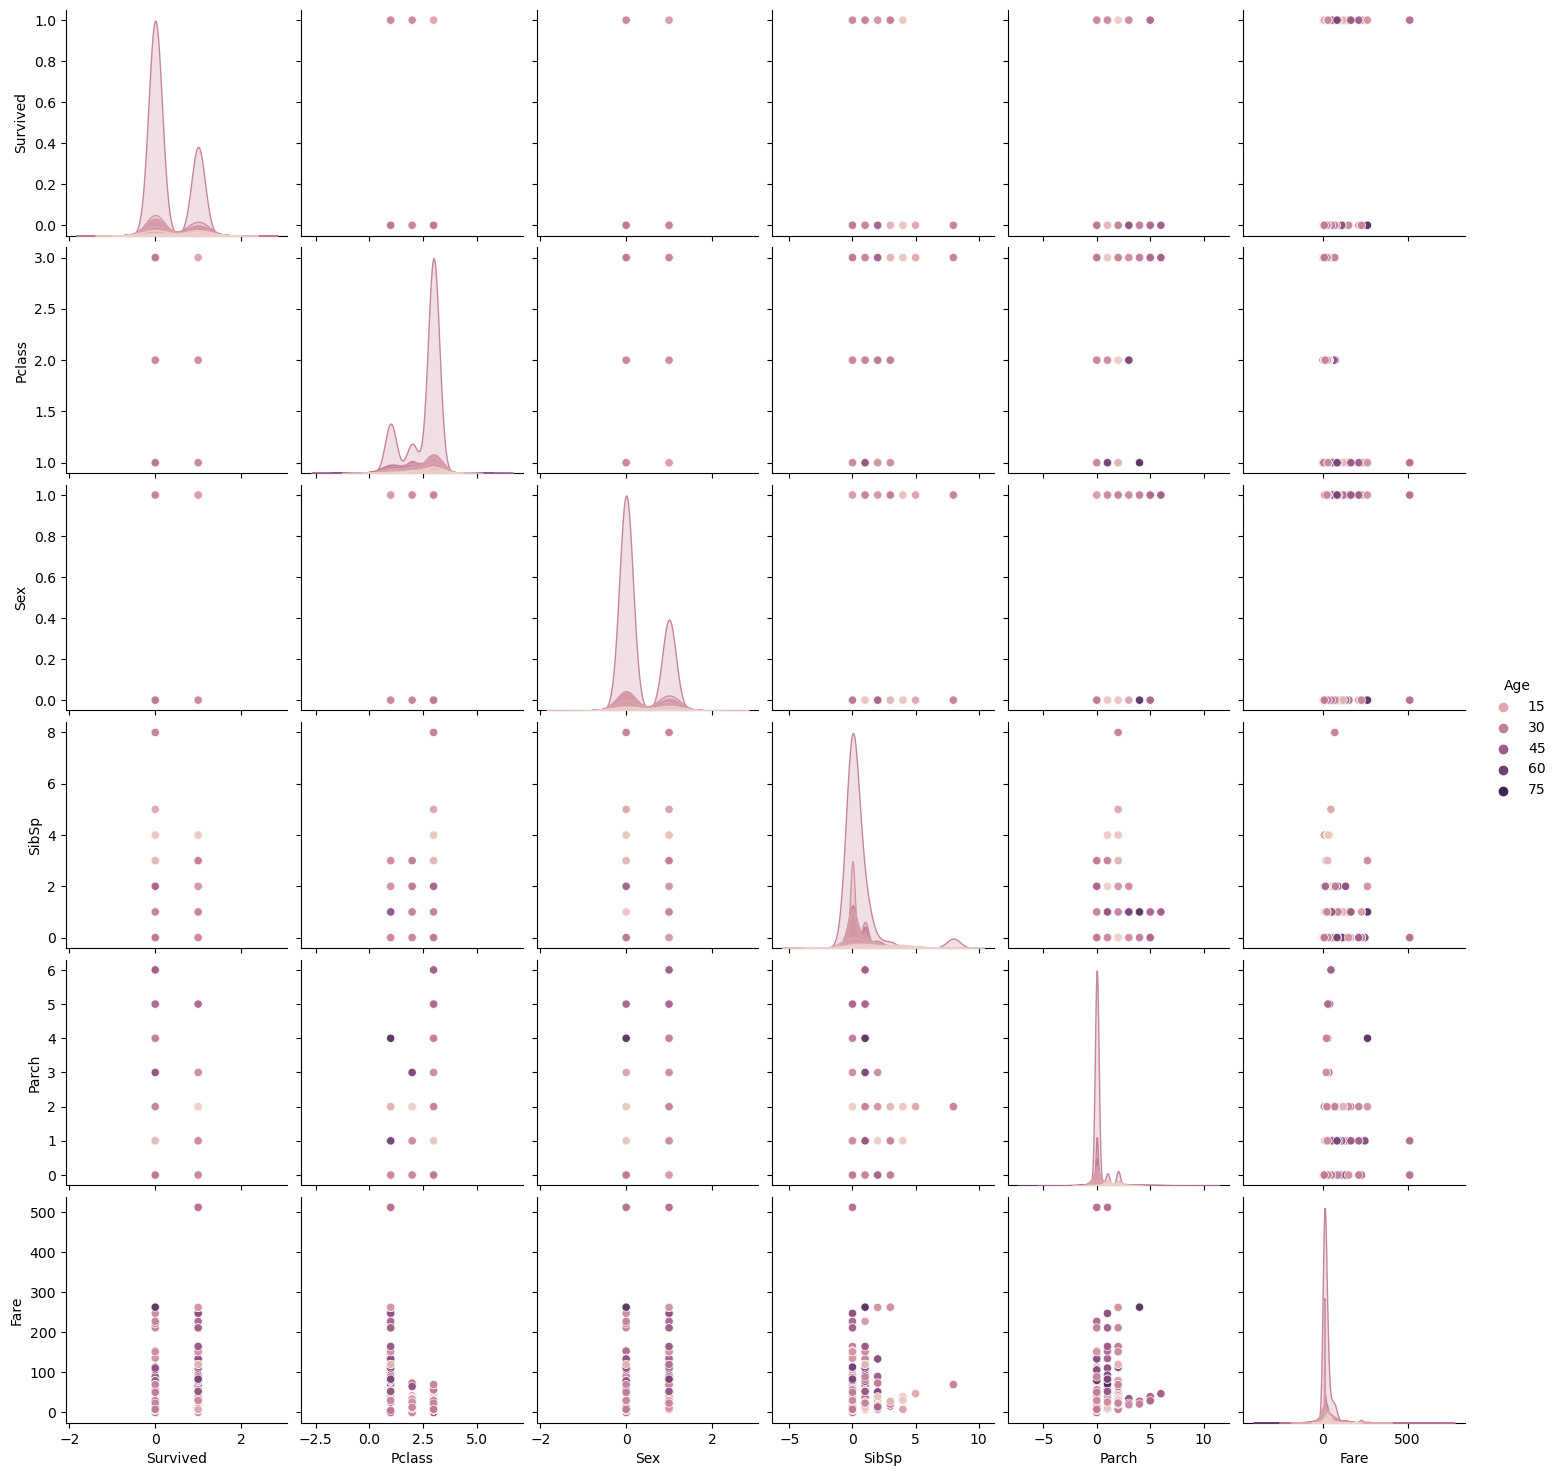

In [24]:
sns.pairplot(df,hue="Age")

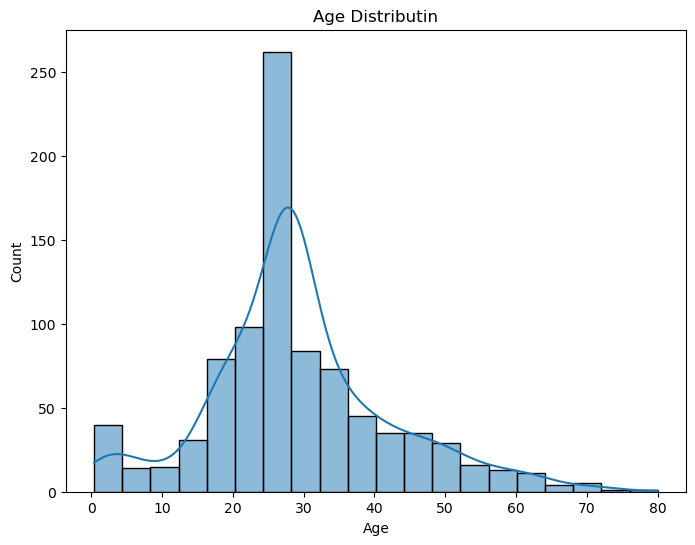

In [25]:
plt.figure(figsize=(8,6))
sns.histplot(df['Age'],bins=20,kde=True)
plt.title('Age Distributin')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

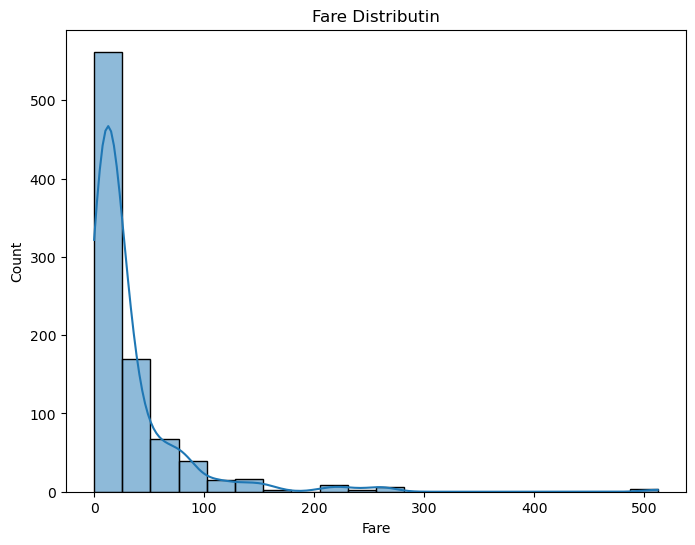

In [26]:
plt.figure(figsize=(8,6))
sns.histplot(df['Fare'],bins=20,kde=True)
plt.title('Fare Distributin')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

C:\Users\Nikhil\AppData\Local\Temp\ipykernel_17064\2145227586.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex',y='Survived',data=df,ci=None)


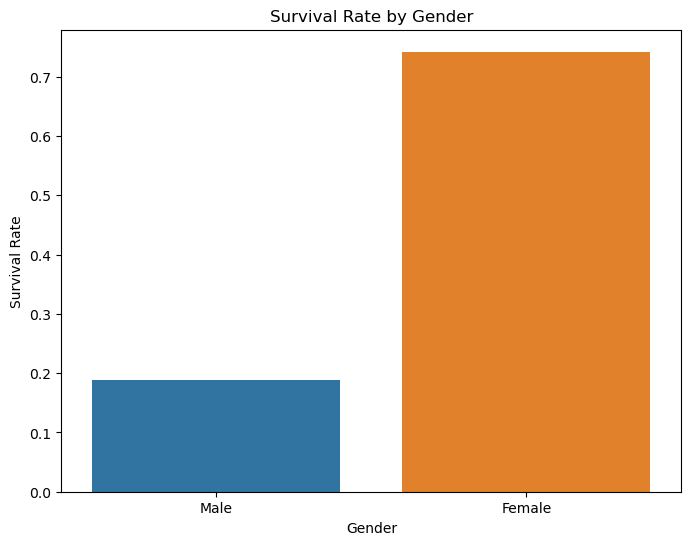

In [27]:
plt.figure(figsize=(8,6))
sns.barplot(x='Sex',y='Survived',data=df,ci=None)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.xticks([0,1],['Male','Female'])
plt.show()

C:\Users\Nikhil\AppData\Local\Temp\ipykernel_17064\2847951947.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass',y='Survived',data=df,ci=None)


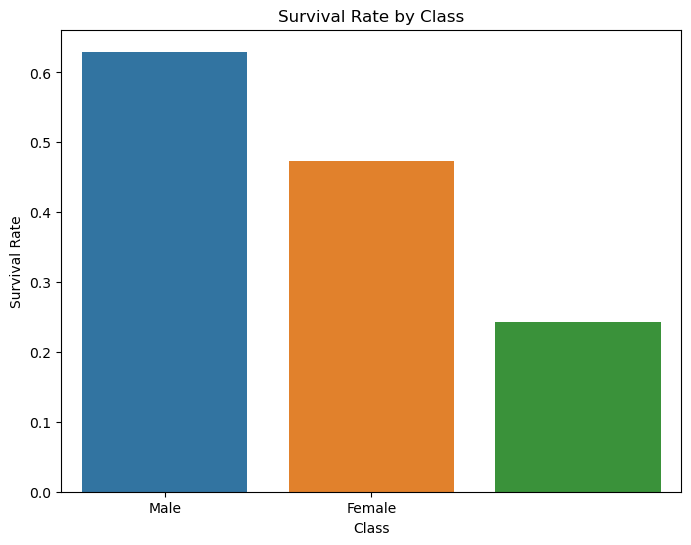

In [28]:
plt.figure(figsize=(8,6))
sns.barplot(x='Pclass',y='Survived',data=df,ci=None)
plt.title('Survival Rate by Class')
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.xticks([0,1],['Male','Female'])
plt.show()

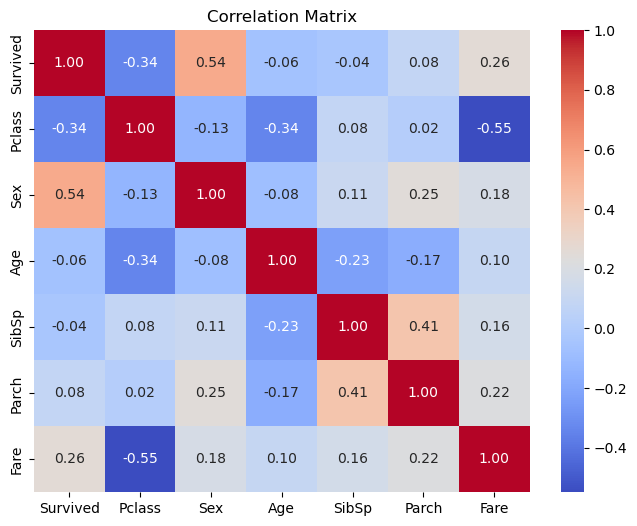

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Correlation Matrix')
plt.show()